In [ ]:
pip install kats

In [ ]:
import pandas as pd

In [ ]:
from kats.consts import TimeSeriesData
from kats.models.prophet import ProphetModel
import numpy as np
import sys
import matplotlib.pyplot as plt
import warnings

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers (1).csv


In [ ]:
air_passengers_df = pd.read_csv("/content/AirPassengers.csv")

In [ ]:
air_passengers_df.dtypes

Month          object
#Passengers     int64
dtype: object

In [ ]:
air_passengers_df.columns = ["time", "value"]

In [ ]:
air_passengers_ts = TimeSeriesData(air_passengers_df)

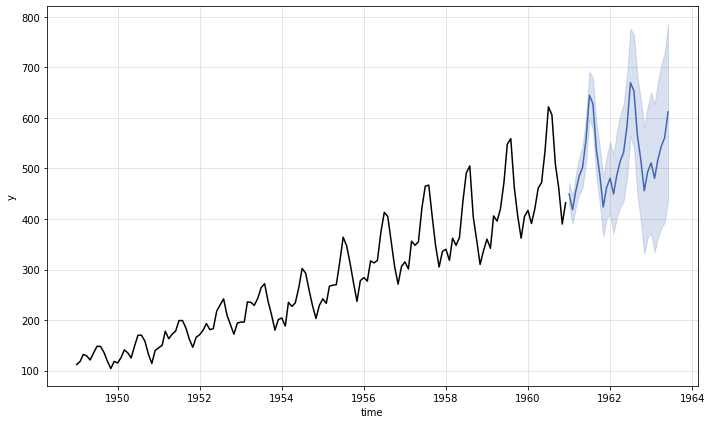

In [ ]:
from kats.models.sarima import SARIMAModel, SARIMAParams
warnings.simplefilter(action='ignore')

# create SARIMA param class
params = SARIMAParams(
    p = 2, 
    d=1, 
    q=1, 
    trend = 'ct', 
    seasonal_order=(1,0,1,12)
    )

# initiate SARIMA model
m = SARIMAModel(data=air_passengers_ts, params=params)

# fit SARIMA model
m.fit()

# generate forecast values
fcst = m.predict(
    steps=30, 
    freq="MS"
    )

# make plot to visualize
m.plot()

In [ ]:
from kats.models.prophet import ProphetModel, ProphetParams

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


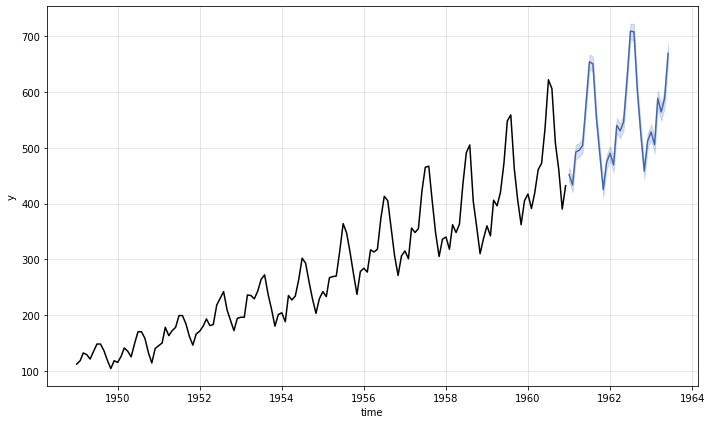

In [ ]:
# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
z = ProphetModel(air_passengers_ts, params)

# fit model simply by calling m.fit()
z.fit()

# make prediction for next 30 month
fcst = z.predict(steps=30, freq="MS")
z.plot()

In [ ]:
from kats.detectors.cusum_detection import CUSUMDetector

In [ ]:
# simulate time series with increase
np.random.seed(10)
df_increase = pd.DataFrame(
    {
        'time': pd.date_range('2019-01-01', '2019-03-01'),
        'increase':np.concatenate([np.random.normal(1,0.2,30), np.random.normal(2,0.2,30)]),
    }
)

# convert to TimeSeriesData object
timeseries = TimeSeriesData(df_increase)

# run detector and find change points
change_points = CUSUMDetector(timeseries).detector()

In [ ]:
change_points

[(TimeSeriesChangePoint(start_time: 2019-01-30 00:00:00, end_time: 2019-01-30 00:00:00, confidence: 1.0),
  <kats.detectors.cusum_detection.CUSUMMetadata at 0x7f187e59e750>)]

In [ ]:
# Initiate feature extraction class
from kats.tsfeatures.tsfeatures import TsFeatures

# convert to TimeSeriesData object
air_passengers_ts = TimeSeriesData(air_passengers_df)

# calculate the TsFeatures
features = TsFeatures().transform(air_passengers_ts)

In [ ]:
features

{'binarize_mean': 0.4444444444444444,
 'crossing_points': 7,
 'diff1y_acf1': 0.30285525815216935,
 'diff1y_acf5': 0.2594591065999471,
 'diff1y_pacf5': 0.21941234780081417,
 'diff2y_acf1': -0.19100586757092733,
 'diff2y_acf5': 0.13420736423784568,
 'diff2y_pacf5': 0.2610103428699484,
 'entropy': 0.42873655617524487,
 'firstmin_ac': 8,
 'firstzero_ac': 52,
 'flat_spots': 2,
 'heterogeneity': 126.0645062581934,
 'histogram_mode': 155.8,
 'holt_alpha': 0.9922867932223828,
 'holt_beta': 9.940723907482928e-05,
 'hurst': -0.08023291030513457,
 'hw_alpha': 0.9999999850988224,
 'hw_beta': 0.0,
 'hw_gamma': 1.3205879697624037e-08,
 'length': 144,
 'level_shift_idx': 118,
 'level_shift_size': 15.599999999999966,
 'linearity': 0.853638165603188,
 'lumpiness': 3041164.5629058965,
 'mean': 280.2986111111111,
 'peak': 6,
 'seas_acf1': 0.6629043863684492,
 'seas_pacf1': 0.15616955255589046,
 'seasonality_strength': 0.3299338017939569,
 'spikiness': 111.69732482853489,
 'stability': 12303.627266589507,